Members:

Rio Pramana

Faaza Naima

Jonathan Mark Hamonangan

Christina Eastti Saktiani

Yosua Lubis

# Data Understanding

Metadata
- Row ID => Unique ID for each row.
- Order ID => Unique Order ID for each Customer.
- Order Date => Order Date of the product.
- Ship Date => Shipping Date of the Product.
- Ship Mode=> Shipping Mode specified by the Customer.
- Customer ID => Unique ID to identify each Customer.
- Customer Name => Name of the Customer.
- Segment => The segment where the Customer belongs.
- Country => Country of residence of the Customer.
- City => City of residence of of the Customer.
- State => State of residence of the Customer.
- Postal Code => Postal Code of every Customer.
- Region => Region where the Customer belong.
- Product ID => Unique ID of the Product.
- Category => Category of the product ordered.
- Sub-Category => Sub-Category of the product ordered.
- Product Name => Name of the Product
- Sales => Sales of the Product.
- Quantity => Quantity of the Product.
- Discount => Discount provided.
- Profit => Profit/Loss incurred.

#### Business Understanding

To optimize profit, it is essential to analyze key factors such as:
Which variable has the strongest correlation with profit?
- In which month was the highest profit recorded based on sales trends?
- Which region generates the highest profit?
- Which product category generates the highest profit?


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = 'Sample - Superstore.xlsx'
df = pd.read_excel(file_path, sheet_name='Orders')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
df.shape

(9994, 21)

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order Date,9994,2018-04-30 10:03:51.979187712,2016-01-03 00:00:00,2017-05-23 00:00:00,2018-06-26 00:00:00,2019-05-14 00:00:00,2019-12-30 00:00:00,NaN
Ship Date,9994,2018-05-04 09:03:29.645787392,2016-01-07 00:00:00,2017-05-27 00:00:00,2018-06-29 00:00:00,2019-05-18 00:00:00,2020-01-05 00:00:00,NaN
Postal Code,9983.0,55245.233297,1040.0,23223.0,57103.0,90008.0,99301.0,32038.715955
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Order ID,9994,5009,CA-2019-100111,14
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country/Region,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001
Region,9994,4,West,3203
Product ID,9994,1862,OFF-PA-10001970,19


# Data Preprocessing

#### Handling Missing Value

In [ ]:
# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

missing_values, data_types

(Row ID             0
 Order ID           0
 Order Date         0
 Ship Date          0
 Ship Mode          0
 Customer ID        0
 Customer Name      0
 Segment            0
 Country/Region     0
 City               0
 State              0
 Postal Code       11
 Region             0
 Product ID         0
 Category           0
 Sub-Category       0
 Product Name       0
 Sales              0
 Quantity           0
 Discount           0
 Profit             0
 dtype: int64,
 Row ID                     int64
 Order ID                  object
 Order Date        datetime64[ns]
 Ship Date         datetime64[ns]
 Ship Mode                 object
 Customer ID               object
 Customer Name             object
 Segment                   object
 Country/Region            object
 City                      object
 State                     object
 Postal Code              float64
 Region                    object
 Product ID                object
 Category                  object
 Sub-Category

In [ ]:
df[df['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2019-104066,2019-12-05,2019-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2017-162887,2017-11-07,2017-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2018-150140,2018-04-06,2018-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2018-165505,2018-01-23,2018-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2018-165505,2018-01-23,2018-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2018-165505,2018-01-23,2018-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2019-127292,2019-01-19,2019-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2019-127292,2019-01-19,2019-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2019-127292,2019-01-19,2019-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2019-127292,2019-01-19,2019-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


In [ ]:
df[df['City']=='Burlington'].head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
683,684,US-2019-168116,2019-11-04,2019-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,27217.0,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.98,4,0.5,-3839.9904


In [ ]:
df['Postal Code'].fillna(27217, inplace=True)

#### Checking & Handling Outliers

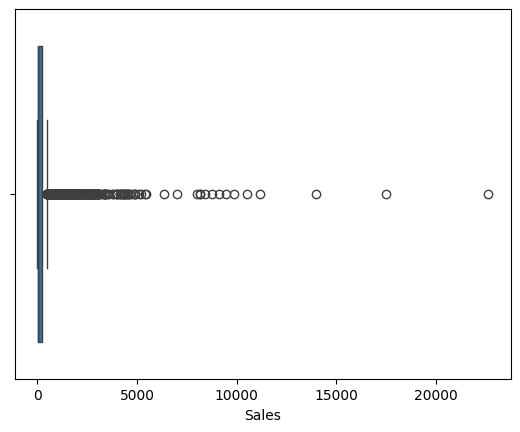

In [ ]:
sns.boxplot(data=df, x='Sales')
plt.show()

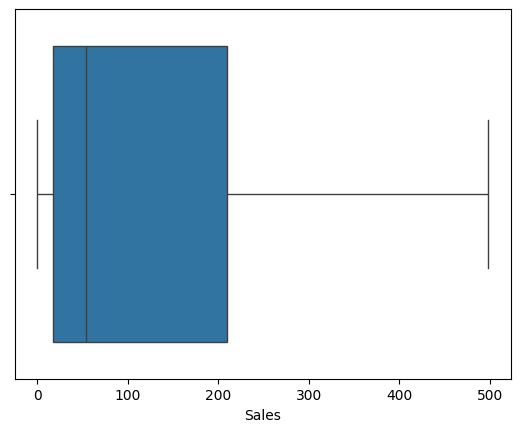

In [ ]:
sns.boxplot(data=df, x='Sales', showfliers=False)
plt.show()

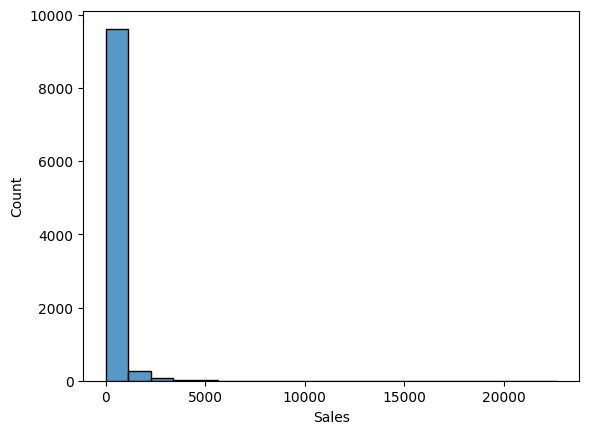

In [ ]:
sns.histplot(data=df, x='Sales', bins=20)
plt.show()

In [ ]:
#How many ouliers on Sales
q1 = np.percentile(df['Sales'],25)
q3 = np.percentile(df['Sales'],75)
iqr = q3-q1

lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)

num_lower = len(df[df['Sales']<lower])
num_upper = len(df[df['Sales']>upper])
out = df[(df['Sales'] < lower) | (df['Sales'] > upper)]
df = df[(df['Sales'] >= lower) & (df['Sales'] <= upper)]

print(f'The outliers on the below is {num_lower} and the sales outliers in the upper is {num_upper}. So, the total outliers on {num_lower+num_upper}')

The outliers on the below is 0 and the profit outliers in the upper is 1167. So, the total outliers on 1167


In [ ]:
df.shape

(8827, 21)

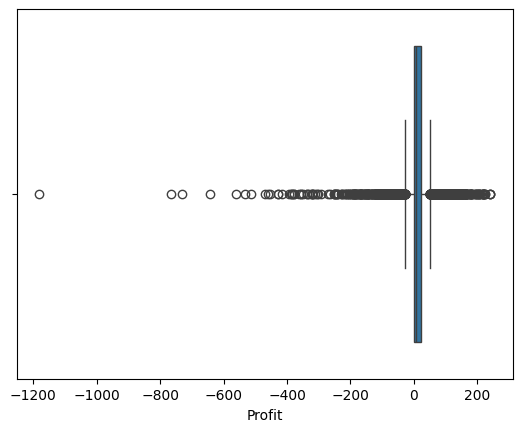

In [ ]:
sns.boxplot(data=df, x='Profit')
plt.show()

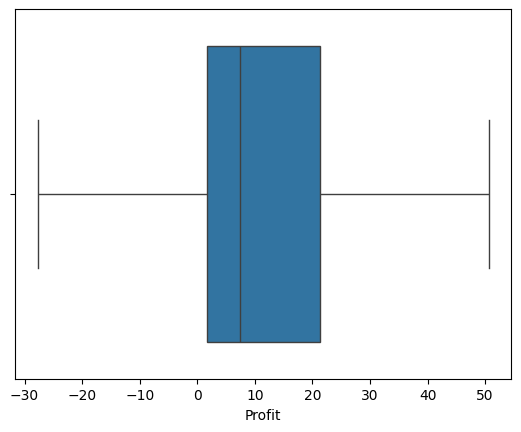

In [ ]:
sns.boxplot(data=df, x='Profit', showfliers=False)
plt.show()

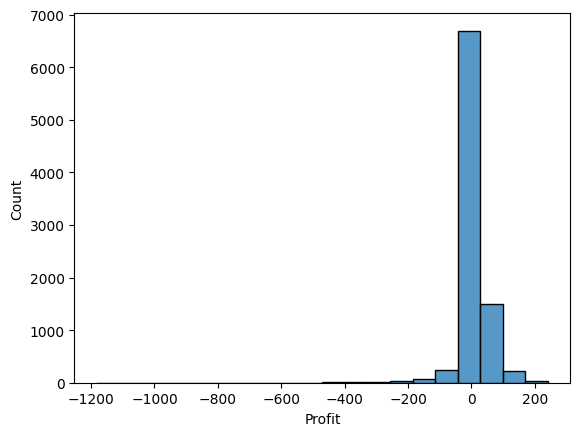

In [ ]:
sns.histplot(data=df, x='Profit', bins=20)
plt.show()

In [ ]:
df[df['Profit'] < 0].count()

,0
Row ID,1612
Order ID,1612
Order Date,1612
Ship Date,1612
Ship Mode,1612
Customer ID,1612
Customer Name,1612
Segment,1612
Country/Region,1612
City,1612


We decided to not remove outliers for Profit since it contains valuable information (e.g. Very big discount leads to huge losses)

# Data Visualization

<ipython-input-225-9f013b28d90b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category", data=df, palette="pastel")


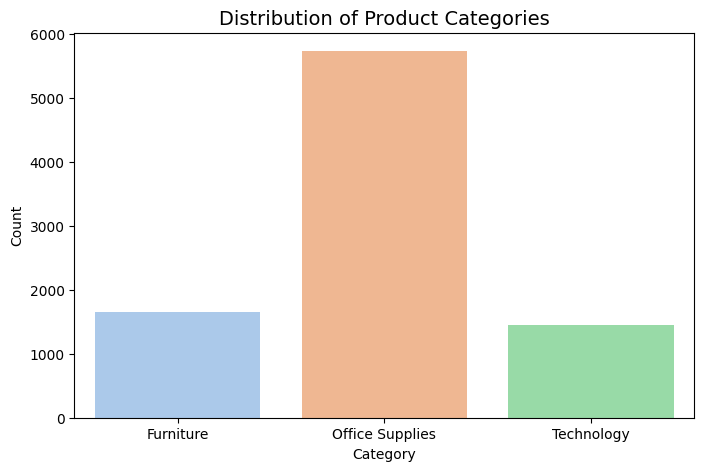

In [ ]:
# 1. Distribution of Product Categories
plt.figure(figsize=(8, 5))
sns.countplot(x="Category", data=df, palette="pastel")
plt.title("Distribution of Product Categories", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

Most Profitable Region-Category:
   Region         Category      Profit
10   West  Office Supplies  31364.5879


<ipython-input-218-997fc4d726a2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="Region", data=region_data, palette="coolwarm", ax=axes[0])
<ipython-input-218-997fc4d726a2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="Region", data=region_data, palette="Blues", ax=axes[1])


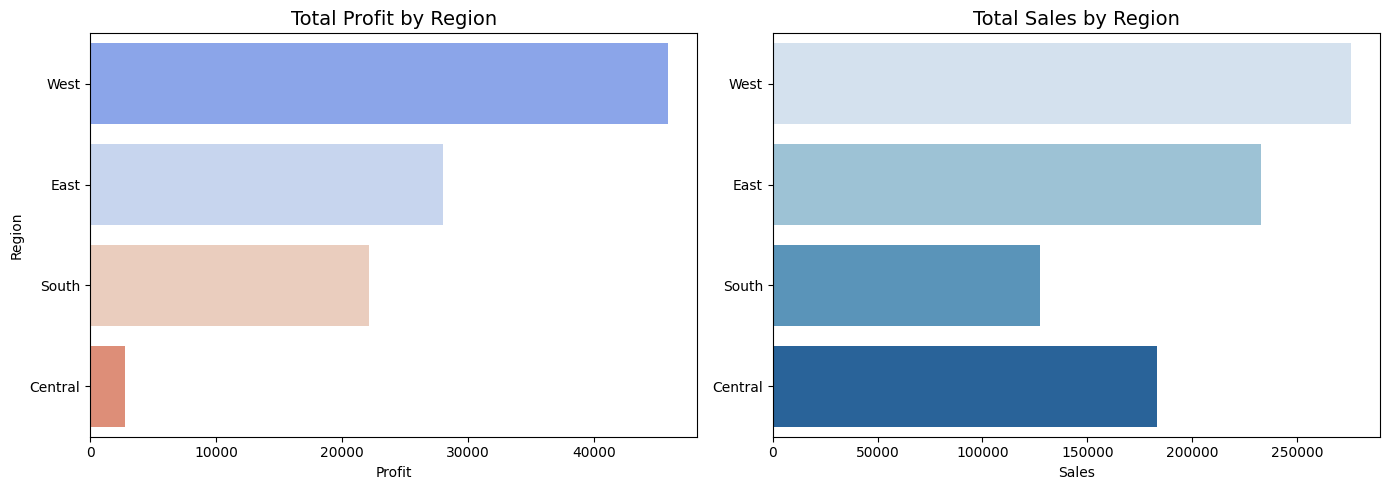

In [ ]:


# 2. Region-Category with the Most Profit
region_category_profit = df.groupby(["Region", "Category"])["Profit"].sum().reset_index()
most_profitable = region_category_profit.sort_values(by="Profit", ascending=False).head(1)

# Display the most profitable region-category
print("Most Profitable Region-Category:")
print(most_profitable)

# 3. Visualizing Profit and Sales by Region (Sorted by Profit Value)
region_data = df.groupby("Region")[["Profit", "Sales"]].sum().reset_index().sort_values(by="Profit", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Profit by Region
sns.barplot(x="Profit", y="Region", data=region_data, palette="coolwarm", ax=axes[0])
axes[0].set_title("Total Profit by Region", fontsize=14)
axes[0].set_xlabel("Profit")
axes[0].set_ylabel("Region")

# Sales by Region
sns.barplot(x="Sales", y="Region", data=region_data, palette="Blues", ax=axes[1])
axes[1].set_title("Total Sales by Region", fontsize=14)
axes[1].set_xlabel("Sales")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

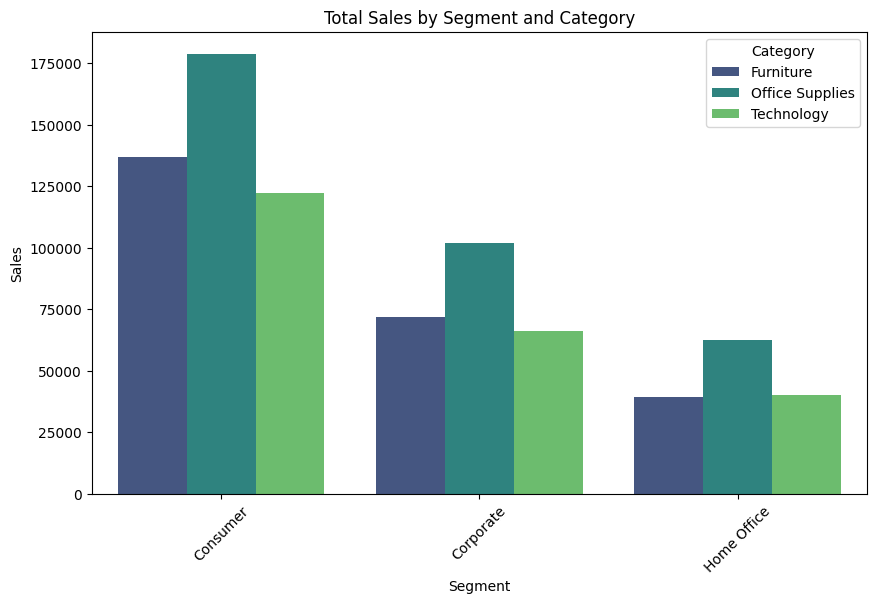

In [ ]:
# Bar Chart: Segment as Primary Group
df_sales = df.groupby(['Segment', 'Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Segment', y='Sales', hue='Category', data=df_sales, palette='viridis')

plt.title('Total Sales by Segment and Category')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()


- The Consumer segment has the highest total sales across all categories, with Office Supplies being the best-selling category.
- The Home Office segment has the lowest total sales across all categories.

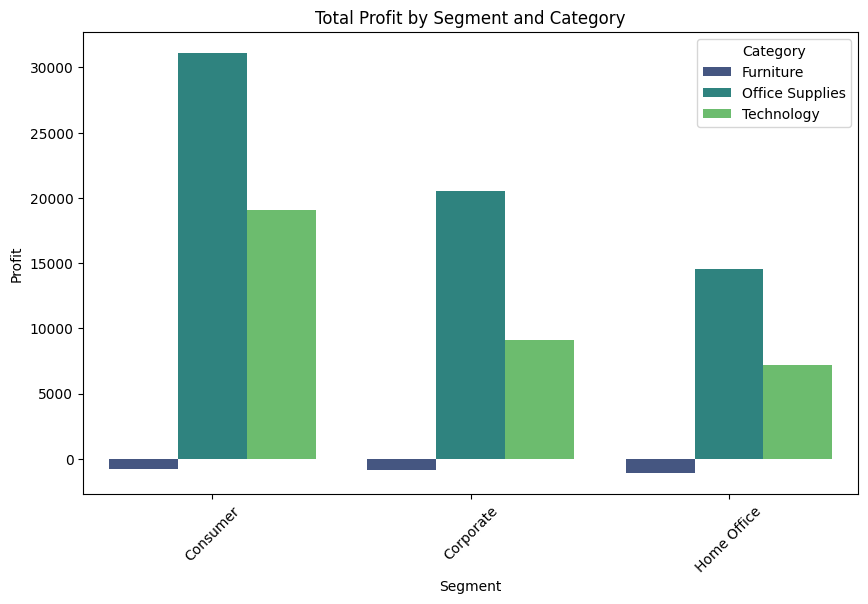

In [ ]:
# Bar Chart: Segment as Primary Group
df_plot = df.groupby(['Segment', 'Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Segment', y='Profit', hue='Category', data=df_plot, palette='viridis')

plt.title('Total Profit by Segment and Category')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()


In [ ]:
df.groupby('Category')['Discount'].mean().reset_index()

,Category,Discount
0,Furniture,0.176294
1,Office Supplies,0.159588
2,Technology,0.128404


- Office Supplies consistently generates the highest profit across all segments, with the Consumer segment achieving the highest profit overall.
- Furniture has the lowest profit across all segments
- Even though Furniture has moderate sales, its profitability is significantly lower compared to Others. This could be due to higher costs or higher discounts applied to Furniture products.

<ipython-input-227-e7f5749f7ad4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Discount", y="Region", data=region_discount, palette="Reds", ax=axes[0])
<ipython-input-227-e7f5749f7ad4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Discount", y="Category", data=category_discount, palette="Oranges", ax=axes[1])


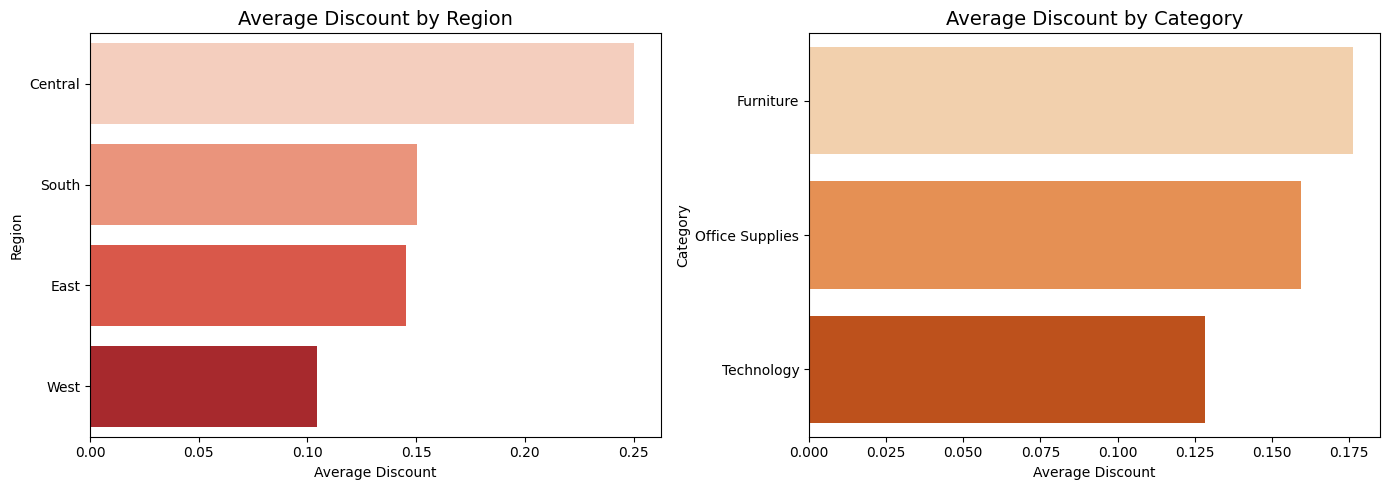

In [ ]:
# Checking Average Discount per Region and Category
region_discount = df.groupby("Region")["Discount"].mean().reset_index().sort_values(by="Discount", ascending=False)
category_discount = df.groupby("Category")["Discount"].mean().reset_index().sort_values(by="Discount", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Average Discount by Region
sns.barplot(x="Discount", y="Region", data=region_discount, palette="Reds", ax=axes[0])
axes[0].set_title("Average Discount by Region", fontsize=14)
axes[0].set_xlabel("Average Discount")
axes[0].set_ylabel("Region")

# Average Discount by Category
sns.barplot(x="Discount", y="Category", data=category_discount, palette="Oranges", ax=axes[1])
axes[1].set_title("Average Discount by Category", fontsize=14)
axes[1].set_xlabel("Average Discount")
axes[1].set_ylabel("Category")

plt.tight_layout()
plt.show()

- Office Supplies consistently generates the highest profit across all segments, with the Consumer segment achieving the highest profit overall.
- Furniture has the lowest profit across all segments, indicating lower profitability despite its sales performance.
- Even though furniture has moderate sales, its profitability is significantly lower compared to others. This could be due to higher costs or higher discounts applied to Furniture products.

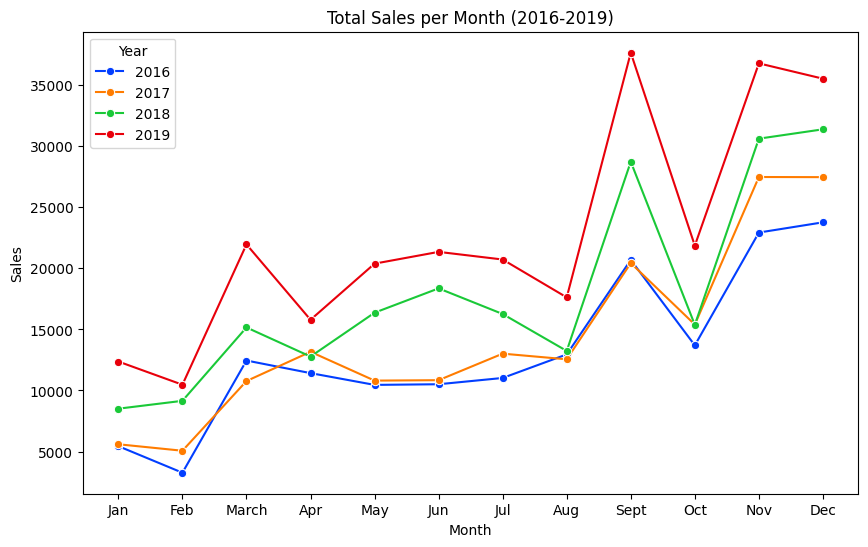

In [ ]:
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(10,6))
# sns.lineplot(data=monthly_sales, x=df['Month'], y=df['Sales'], hue=df['Year'], marker='o')
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o',  palette='bright')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

plt.title('Total Sales per Month (2016-2019)')
plt.show()

From the "Total Sales per Month (2016-2019)" graph, we can identify sales patterns and determine the peak seasons or months with the highest sales:
- The peak season or highest sales period occurs in September, November, and December
- This could be due to several factors, such as:
  - Year-end holiday season (Christmas & New Year) increasing consumer spending
  - Major discounts and promotions like Black Friday or online shopping festivals
  - Changes in business trends or customer behavior, where people tend to shop more towards the end of the year

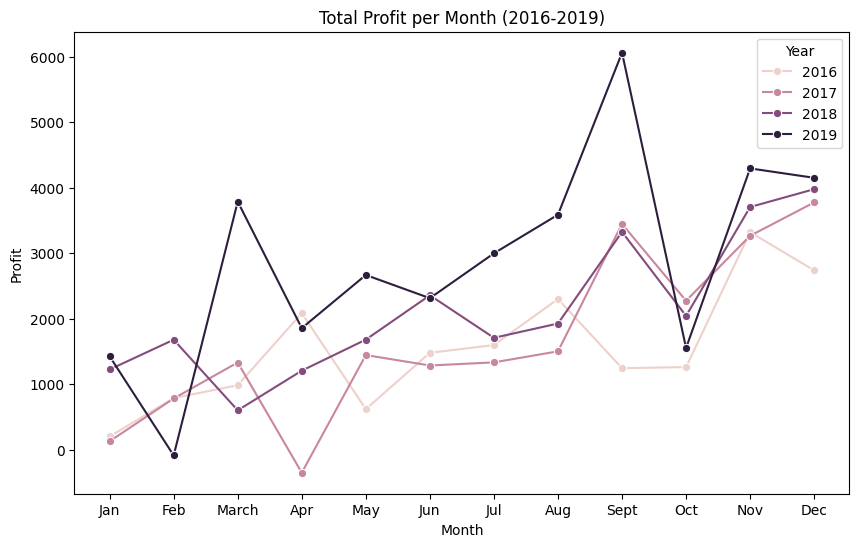

In [ ]:
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

monthly_profit = df.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_profit, x='Month', y='Profit', hue='Year', marker='o')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

plt.title('Total Profit per Month (2016-2019)')
plt.show()

From the "Total Profit per Month (2016-2019)" graph, we can identify profit patterns and determine the peak seasons or months with the highest profit:
- the peak profit season occurs in September, November, and December, similar to the sales trend.

In [ ]:
df_trend=df.groupby(['Year','Month'])['Discount'].agg(['sum']).reset_index()
# df_trend

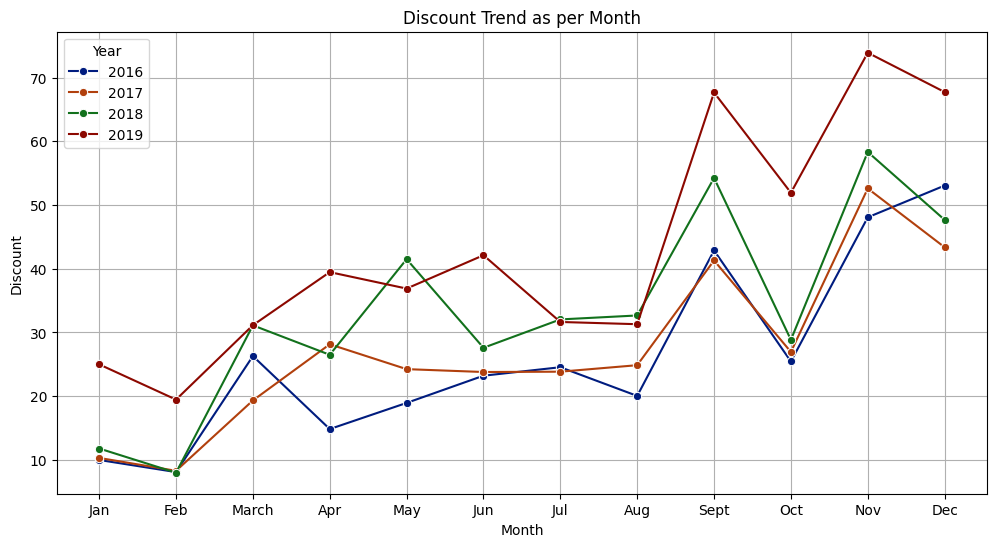

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_trend, x='Month', y='sum', hue='Year', marker='o', palette='dark')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.title('Discount Trend as per Month')
plt.xlabel('Month')
plt.ylabel('Discount')
plt.legend(title='Year')
plt.grid(True)

plt.show()

 In September, November, December, discounts increase significantly as follow the sales trend.  which coincides with a sharp rise in sales and profit (as seen in the profit trend graph).

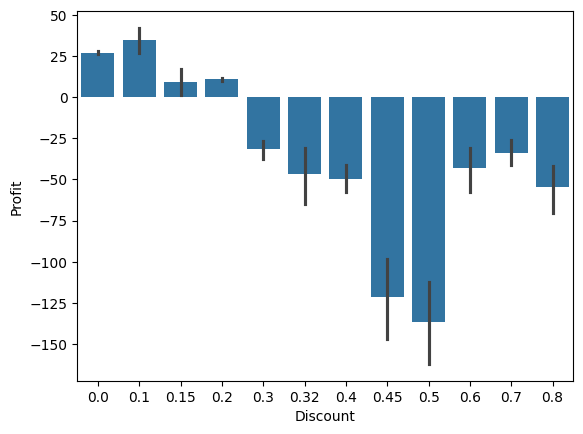

In [ ]:
sns.barplot(x=df['Discount'], y=df['Profit'])
plt.show()

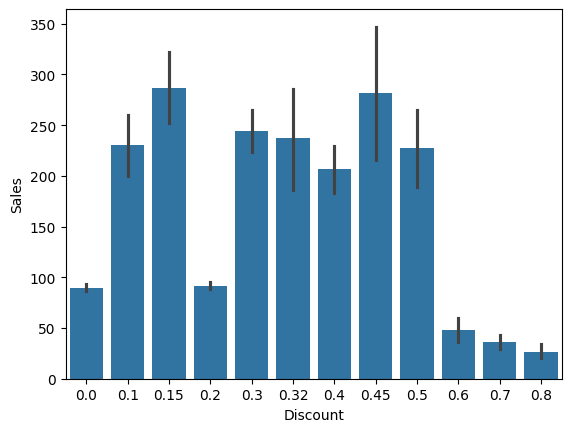

In [ ]:
sns.barplot(x=df['Discount'], y=df['Sales'])
plt.show()

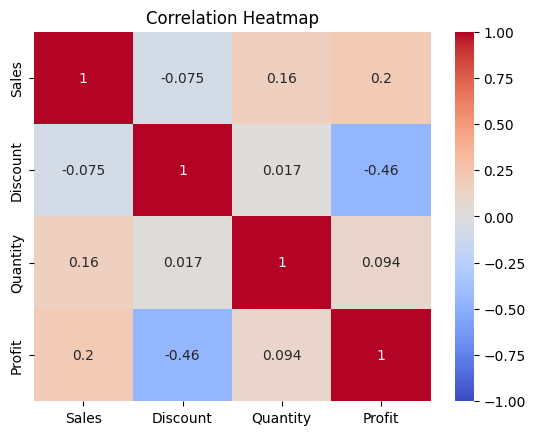

In [ ]:
sns.heatmap(df[["Sales", "Discount", "Quantity", "Profit"]].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from scipy import stats

# ANOVA Test: Does the Central Region Have Higher Discounts Than Other Regions?
anova_region = stats.f_oneway(
    df[df["Region"] == "Central"]["Discount"],
    df[df["Region"] == "West"]["Discount"],
    df[df["Region"] == "East"]["Discount"],
    df[df["Region"] == "South"]["Discount"]
)
print("\n--- ANOVA Test for Discounts Across Regions ---")
print(f"F-statistic: {anova_region.statistic:.4f}")
print(f"P-value: {anova_region.pvalue:.4e}")
if anova_region.pvalue < 0.05:
    print("Conclusion: There is a significant difference in discounts between regions.")
else:
    print("Conclusion: No significant difference in discounts between regions.")

# T-Test: Do Negative Profit Categories Have Higher Discounts?
negative_profit_category = "Furniture"  # Only Furniture has negative profit
high_discount = df[df["Category"] == negative_profit_category]["Discount"]
low_discount = df[df["Category"] != negative_profit_category]["Discount"]

t_test_category = stats.ttest_ind(high_discount, low_discount, equal_var=False)
print("\n--- T-Test for Discounts Between Negative Profit Category (Furniture) and Others ---")
print(f"T-statistic: {t_test_category.statistic:.4f}")
print(f"P-value: {t_test_category.pvalue:.4e}")
if t_test_category.pvalue < 0.05:
    print("Conclusion: The Furniture category has significantly different discount rates compared to other categories.")
else:
    print("Conclusion: No significant difference in discount rates for the Furniture category compared to others.")


--- ANOVA Test for Discounts Across Regions ---
F-statistic: 207.8555
P-value: 2.8206e-130
Conclusion: There is a significant difference in discounts between regions.

--- T-Test for Discounts Between Negative Profit Category (Furniture) and Others ---
T-statistic: 4.3059
P-value: 1.7224e-05
Conclusion: The Furniture category has significantly different discount rates compared to other categories.
